In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline



In [3]:
ff1.Cache.enable_cache('cache') 


In [4]:
year, grand_prix, session = 2022, 'Hungary', 'R'

In [5]:
race_hungary=ff1.get_session(year, grand_prix, session)
race_hungary.load()

utils          INFO 	NumExpr defaulting to 4 threads.
core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


In [6]:
race_hungary.event


RoundNumber                                            13
Country                                           Hungary
Location                                         Budapest
OfficialEventName    FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2022
EventDate                             2022-07-31 17:00:00
EventName                            Hungarian Grand Prix
EventFormat                                  conventional
Session1                                       Practice 1
Session1Date                          2022-07-29 14:00:00
Session2                                       Practice 2
Session2Date                          2022-07-29 17:00:00
Session3                                       Practice 3
Session3Date                          2022-07-30 13:00:00
Session4                                       Qualifying
Session4Date                          2022-07-30 16:00:00
Session5                                             Race
Session5Date                          2022-07-31 15:00:00
F1ApiSupport  

In [7]:
lec=race_hungary.laps.pick_driver('LEC')
ver=race_hungary.laps.pick_driver('VER')
carlos=race_hungary.laps.pick_driver('SAI')

In [8]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 70 entries, 350 to 419
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                70 non-null     timedelta64[ns]
 1   DriverNumber        70 non-null     object         
 2   LapTime             69 non-null     timedelta64[ns]
 3   LapNumber           70 non-null     int64          
 4   Stint               70 non-null     int64          
 5   PitOutTime          4 non-null      timedelta64[ns]
 6   PitInTime           3 non-null      timedelta64[ns]
 7   Sector1Time         69 non-null     timedelta64[ns]
 8   Sector2Time         70 non-null     timedelta64[ns]
 9   Sector3Time         70 non-null     timedelta64[ns]
 10  Sector1SessionTime  69 non-null     timedelta64[ns]
 11  Sector2SessionTime  70 non-null     timedelta64[ns]
 12  Sector3SessionTime  70 non-null     timedelta64[ns]
 13  SpeedI1             58 non-null     float64  

In [9]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True)

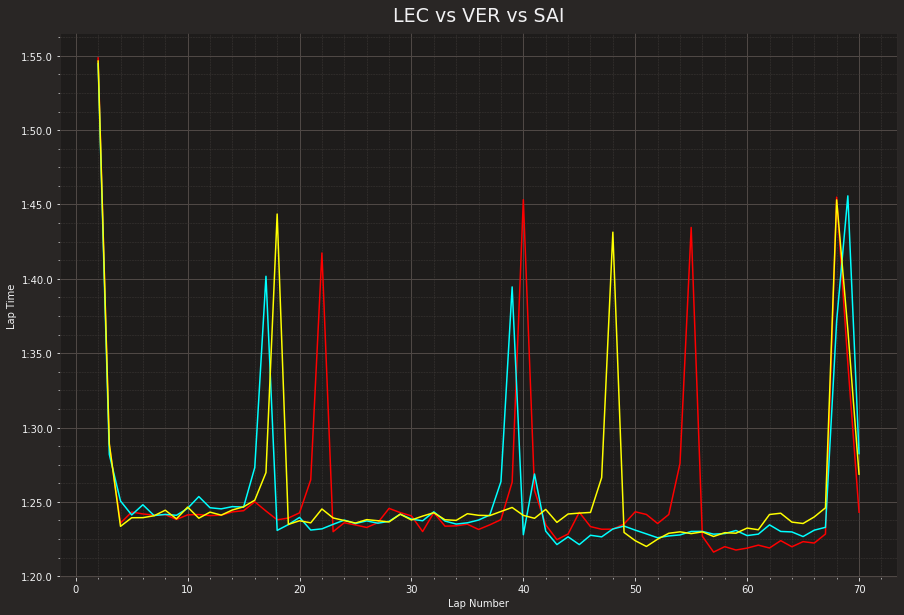

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(lec['LapNumber'], lec['LapTime'], color='red')
ax.plot(ver['LapNumber'], ver['LapTime'], color='cyan')
ax.plot(carlos['LapNumber'], carlos['LapTime'], color='yellow')
ax.set_title("LEC vs VER vs SAI")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()


In [11]:
data={'Compound':lec['Compound'],'LapTime':lec['LapTime'],'Stint':lec['Stint']}
leclerc=pd.DataFrame(data)

In [12]:
data={'Compound':ver['Compound'],'LapTime':ver['LapTime'],'Stint':ver['Stint']}
verstappen=pd.DataFrame(data)

In [13]:
data={'Compound':carlos['Compound'],'LapTime':carlos['LapTime'],'Stint':carlos['Stint']}
sainz=pd.DataFrame(data)

In [14]:
leclerc=leclerc[leclerc['LapTime'] <= '0 days 00:01:40.00000']
verstappen=verstappen[verstappen['LapTime'] <= '0 days 00:01:40.00000']
sainz=sainz[sainz['LapTime'] <= '0 days 00:01:40.00000']

In [15]:
leclerc_1stMedium_stint=leclerc['LapTime'].loc[leclerc['Stint']==1]
leclerc_2ndMedium_stint=leclerc['LapTime'].loc[leclerc['Stint']==2]
leclerc_3rdHard_stint=leclerc['LapTime'].loc[leclerc['Stint']==3]
leclerc_4thSoft_stint=leclerc['LapTime'].loc[leclerc['Stint']==4]

verstappen_1stSoft_stint=verstappen['LapTime'].loc[verstappen['Stint']==1]
verstappen_2ndMedium_stint=verstappen['LapTime'].loc[verstappen['Stint']==2]
verstappen_3rdMedium_stint=verstappen['LapTime'].loc[verstappen['Stint']==3]

sainz_1stMedium_stint=sainz['LapTime'].loc[sainz['Stint']==1]
sainz_2ndMedium_stint=sainz['LapTime'].loc[sainz['Stint']==2]
sainz_3rdSoft_stint=sainz['LapTime'].loc[sainz['Stint']==3]

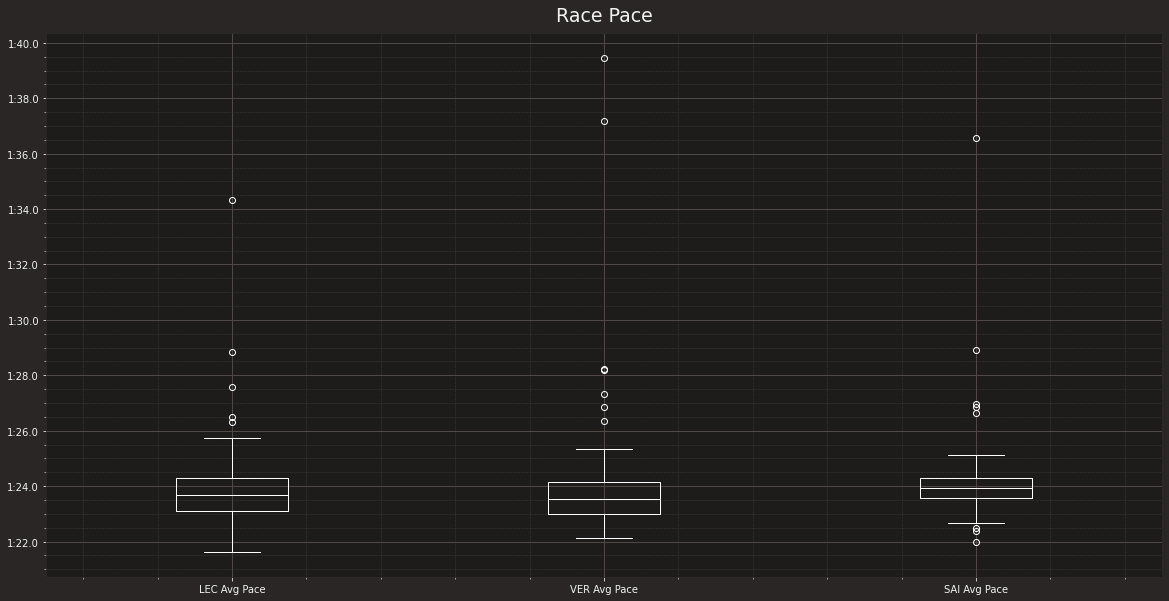

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

columns=[leclerc['LapTime'],verstappen['LapTime'],sainz['LapTime']]
ax.set_title("Race Pace")
ax.boxplot(columns,boxprops={'color':'white'},flierprops={'markeredgecolor':'white'},medianprops={'color':'white'},whiskerprops={'color':'white'},capprops={'color':'white'})
plt.xticks([1,2,3], ["LEC Avg Pace","VER Avg Pace","SAI Avg Pace"])
plt.show()

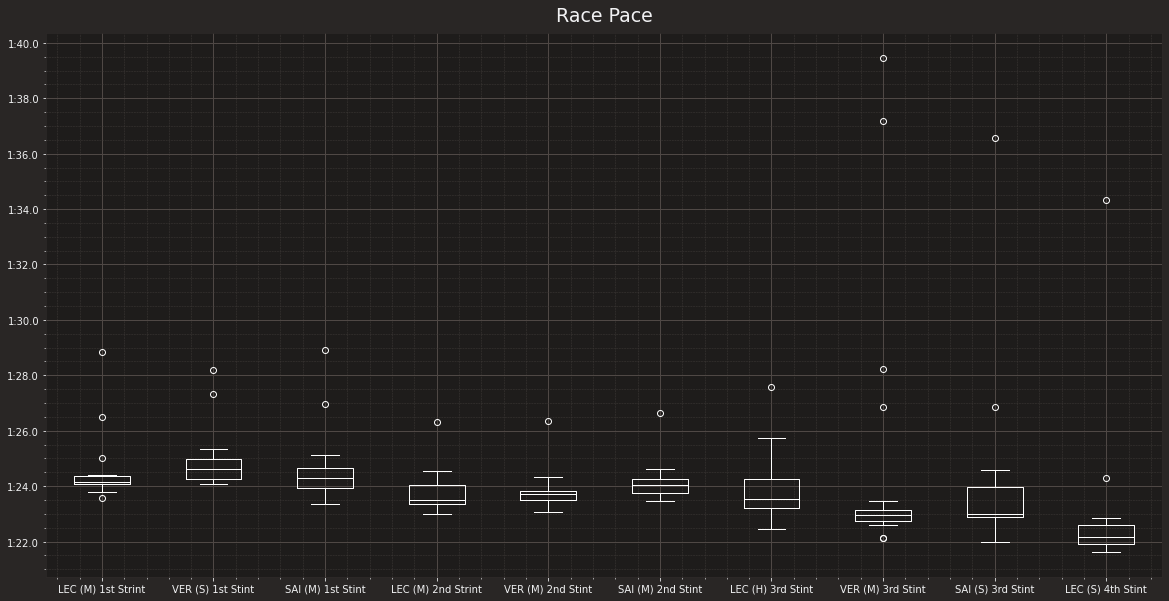

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

columns = [leclerc_1stMedium_stint,verstappen_1stSoft_stint,sainz_1stMedium_stint, leclerc_2ndMedium_stint,verstappen_2ndMedium_stint,sainz_2ndMedium_stint,leclerc_3rdHard_stint,verstappen_3rdMedium_stint,sainz_3rdSoft_stint,leclerc_4thSoft_stint]
ax.set_title("Race Pace")
ax.boxplot(columns,boxprops={'color':'white'},flierprops={'markeredgecolor':'white'},medianprops={'color':'white'},whiskerprops={'color':'white'},capprops={'color':'white'})
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["LEC (M) 1st Strint","VER (S) 1st Stint","SAI (M) 1st Stint", "LEC (M) 2nd Strint","VER (M) 2nd Stint","SAI (M) 2nd Stint","LEC (H) 3rd Stint","VER (M) 3rd Stint","SAI (S) 3rd Stint","LEC (S) 4th Stint"])
plt.show()

In [21]:
lec['LapTime'].loc[lec['Stint']==3]

389   0 days 00:01:45.325000
390   0 days 00:01:25.755000
391   0 days 00:01:23.462000
392   0 days 00:01:22.456000
393   0 days 00:01:22.839000
394   0 days 00:01:24.300000
395   0 days 00:01:23.335000
396   0 days 00:01:23.158000
397   0 days 00:01:23.163000
398   0 days 00:01:23.509000
399   0 days 00:01:24.334000
400   0 days 00:01:24.152000
401   0 days 00:01:23.544000
402   0 days 00:01:24.154000
403   0 days 00:01:27.578000
dtype: timedelta64[ns]

In [23]:
leclap=lec.loc[392]

In [22]:
ver['LapTime'].loc[ver['Stint']==3]

38   0 days 00:01:39.455000
39   0 days 00:01:22.789000
40   0 days 00:01:26.874000
41   0 days 00:01:23.031000
42   0 days 00:01:22.128000
43   0 days 00:01:22.650000
44   0 days 00:01:22.126000
45   0 days 00:01:22.754000
46   0 days 00:01:22.646000
47   0 days 00:01:23.177000
48   0 days 00:01:23.373000
49   0 days 00:01:23.098000
50   0 days 00:01:22.846000
51   0 days 00:01:22.586000
52   0 days 00:01:22.708000
53   0 days 00:01:22.777000
54   0 days 00:01:23.010000
55   0 days 00:01:23.013000
56   0 days 00:01:22.827000
57   0 days 00:01:22.868000
58   0 days 00:01:23.074000
59   0 days 00:01:22.732000
60   0 days 00:01:22.831000
61   0 days 00:01:23.454000
62   0 days 00:01:23.010000
63   0 days 00:01:22.978000
64   0 days 00:01:22.667000
65   0 days 00:01:23.097000
66   0 days 00:01:23.287000
67   0 days 00:01:37.167000
68   0 days 00:01:45.578000
69   0 days 00:01:28.244000
dtype: timedelta64[ns]

In [25]:
verlap=ver.loc[44]

In [29]:
telemetry_lec=leclap.get_telemetry().add_distance()
telemetry_max= verlap.get_telemetry().add_distance()

In [31]:
delta_time, ref_tel, compare_tel = utils.delta_time(leclap,verlap)

In [27]:
plot_size = [15, 15]
plot_title = "Leclerc fastest Hard 3rd Stint lap Vs Max fastest Medium 3rd lap"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]

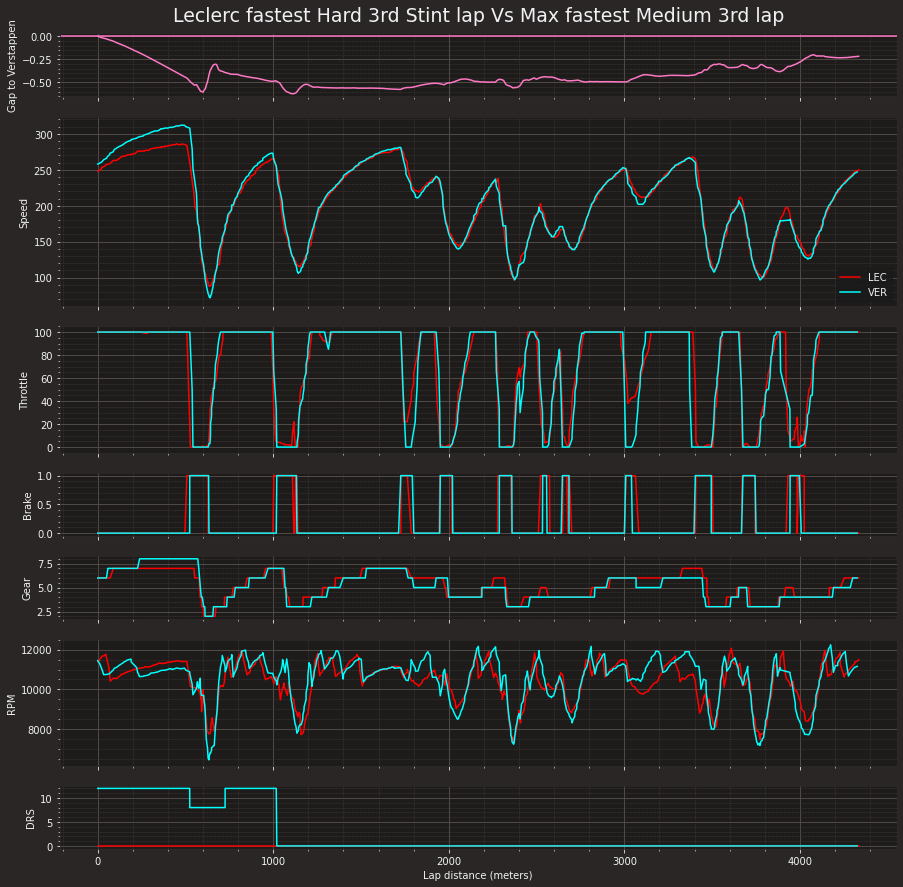

In [32]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel="Gap to Verstappen")

# Speed trace
ax[1].plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label="LEC", color="red")
ax[1].plot(telemetry_max['Distance'], telemetry_max['Speed'], label="VER", color="cyan")
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_lec['Distance'], telemetry_lec['Throttle'], label="LEC", color="red")
ax[2].plot(telemetry_max['Distance'], telemetry_max['Throttle'], label="VER", color="cyan")
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_lec['Distance'], telemetry_lec['Brake'], label="LEC", color="red")
ax[3].plot(telemetry_max['Distance'], telemetry_max['Brake'], label="VER", color="cyan")
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_lec['Distance'], telemetry_lec['nGear'], label="LEC", color="red")
ax[4].plot(telemetry_max['Distance'], telemetry_max['nGear'], label="VER", color="cyan")
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_lec['Distance'], telemetry_lec['RPM'], label="LEC", color="red")
ax[5].plot(telemetry_max['Distance'], telemetry_max['RPM'], label="VER", color="cyan")
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_lec['Distance'], telemetry_lec['DRS'], label="LEC", color="red")
ax[6].plot(telemetry_max['Distance'], telemetry_max['DRS'], label="VER", color="cyan")
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()